C:\Users\tharu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\tharu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 846ms/step - accuracy: 0.7669 - loss: 0.7170 - val_accuracy: 0.5000 - val_loss: 9.2767 - learning_rate: 0.0010
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 873ms/step - accuracy: 0.8990 - loss: 0.2455 - val_accuracy: 0.5000 - val_loss: 7.5757 - learning_rate: 0.0010
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 820ms/step - accuracy: 0.9122 - loss: 0.2273 - val_accuracy: 0.5000 - val_loss: 38.7176 - learning_rate: 0.0010
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 889ms/step - accuracy: 0.9120 - loss: 0.2145 - val_accuracy: 0.5000 - val_loss: 4.1944 - learning_rate: 0.0010
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 147s 896ms/step - accuracy: 0.9340 - loss: 0.1626 - val_accuracy: 0.5000 - val_loss: 1456.3418 - learning_rate: 0.0010
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 911ms/step - accuracy: 0.9272 - loss: 0.1916 - val_accuracy: 0.5000 - val_loss: 2082.4458 - learning_rate: 0.0010
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 931ms/step - accuracy: 

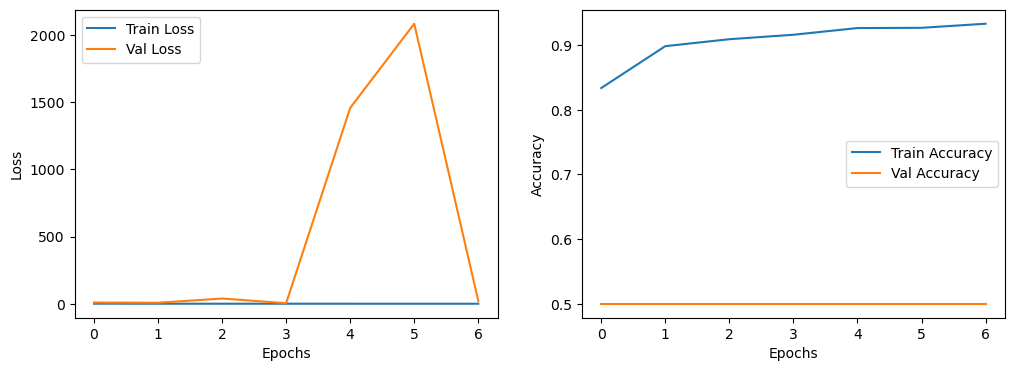

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.6216 - loss: 2.7728
Test Loss: 2.7436017990112305
Test Accuracy: 0.625
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



C:\Users\tharu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tharu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tharu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


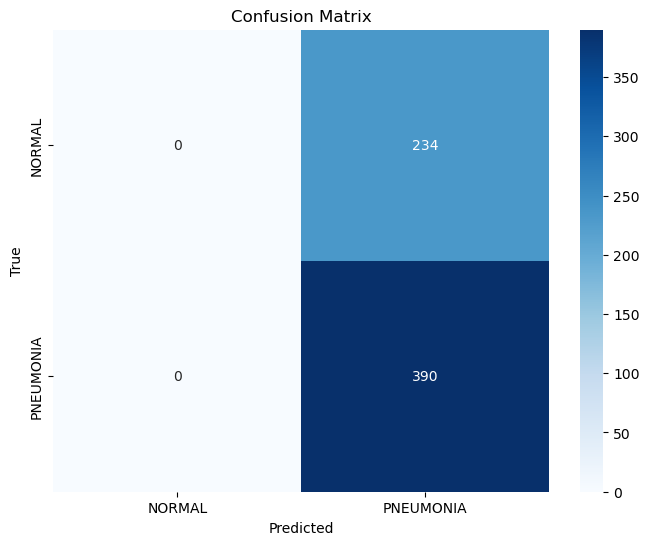

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


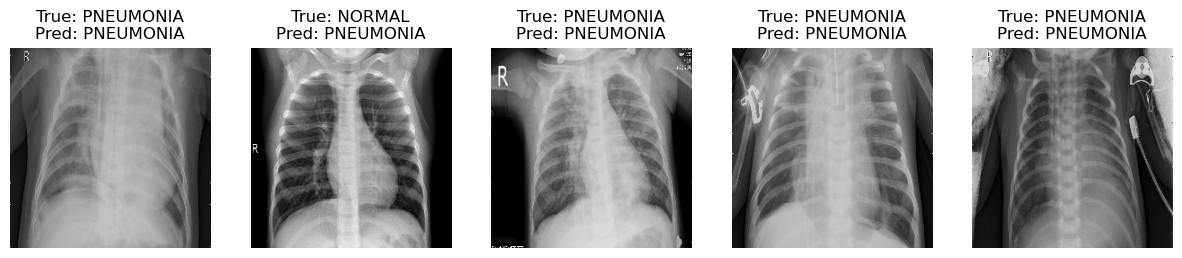

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step


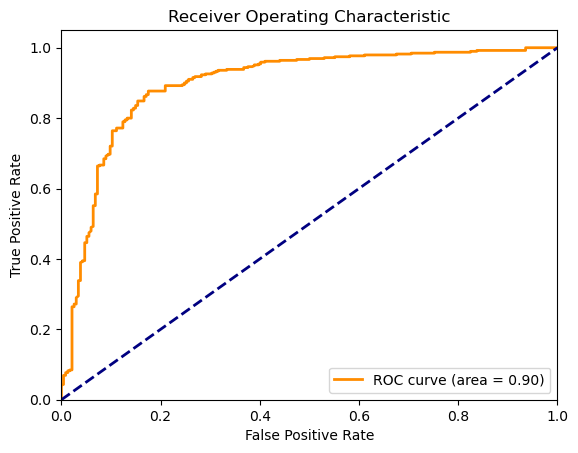

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def load_images_from_folder(folder, classes, img_size=(224, 224)):
    X = []
    y = []
    for class_folder in os.listdir(folder):
        label = classes.index(class_folder)
        class_path = os.path.join(folder, class_folder)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if arr is not None:
                arr = cv2.resize(arr, img_size)
                X.append(arr / 255.0)
                y.append(label)
    return np.array(X), np.array(y)

def preprocess_data(base_path, classes):
    train_folder = os.path.join(base_path, "train")
    val_folder = os.path.join(base_path, "val")
    test_folder = os.path.join(base_path, "test")
    
    X_train, y_train = load_images_from_folder(train_folder, classes)
    X_val, y_val = load_images_from_folder(val_folder, classes)
    X_test, y_test = load_images_from_folder(test_folder, classes)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

def create_model(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation="relu", input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(64, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Flatten(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(2, activation="softmax")
    ])
    
    return model

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_sample_predictions(model, X, y, classes, num_samples=5):
    indices = np.random.choice(len(X), num_samples, replace=False)
    X_samples = X[indices]
    y_samples = y[indices]
    y_pred = np.argmax(model.predict(X_samples), axis=1)
    
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_samples[i].reshape(224, 224), cmap='gray')
        plt.title(f"True: {classes[y_samples[i]]}\nPred: {classes[y_pred[i]]}")
        plt.axis('off')
    plt.show()

def plot_roc_curve(y_true, y_pred, classes):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

def main(base_path):
    classes = ["NORMAL", "PNEUMONIA"]
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = preprocess_data(base_path, classes)
    
    X_train, y_train = shuffle(X_train, y_train)
    X_val, y_val = shuffle(X_val, y_val)
    X_test, y_test = shuffle(X_test, y_test)
    
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
    input_shape = (224, 224, 1)
    model = create_model(input_shape)
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
    
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                        validation_data=(X_val, y_val),
                        epochs=20,
                        callbacks=[early_stopping, reduce_lr])
    
    plot_training_history(history)
    
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    print(classification_report(y_test, y_pred, target_names=classes))
    
    plot_confusion_matrix(y_test, y_pred, classes)
    plot_sample_predictions(model, X_test, y_test, classes)
    
    y_pred_proba = model.predict(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_proba, classes)
    
    model.save('pneumonia_model_improved.h5')

if __name__ == "__main__":
    base_path = r'C:\Users\tharu\OneDrive\Desktop\pneumonia\chest_xray'
    main(base_path)
